In [44]:
import pandas as pd
import numpy as np
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [45]:
train_file_name = 'dota2Train.csv'
test_file_name = 'dota2Test.csv'

train_data = pd.read_csv(train_file_name, header=None)
test_data = pd.read_csv(test_file_name, header=None)

test_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,-1,223,8,2,0,-1,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
1,1,227,8,2,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
2,-1,136,2,2,1,0,0,0,-1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,227,2,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,184,2,3,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,231,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
6,1,152,2,2,0,0,0,0,0,-1,...,0,1,0,0,0,0,0,0,0,0
7,-1,153,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-1,223,8,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,-1,153,2,2,0,0,0,0,-1,1,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# 0. Team won the game (1 or -1)
# 1. Cluster ID (related to location)
# 2. Game mode (eg All Pick)
# 3. Game type (eg. Ranked)

def rename_columns(dataset):
    dataset.rename(columns={0:'result', 1:'cluster_id', 2:'game_mode', 3:'game_type'}, inplace=True)

In [47]:
rename_columns(train_data)
rename_columns(test_data)
test_data.head()
train_data['result'] = train_data['result'].map({-1:0, 1:1})
test_data['result'] = test_data['result'].map({-1:0, 1:1})

train_data.drop(columns='cluster_id', inplace=True)
test_data.drop(columns='cluster_id', inplace=True)

test_data.head()

,result,game_mode,game_type,4,5,6,7,8,9,10,...,107,108,109,110,111,112,113,114,115,116
0,0,8,2,0,-1,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
1,1,8,2,0,0,0,0,0,0,0,...,-1,0,0,0,0,0,0,0,0,0
2,0,2,2,1,0,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,2,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,3,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
train_data.result.value_counts()

1    48782
0    43868
Name: result, dtype: int64

In [50]:
def split(train_d, test_d):
    x_train = train_d.loc[:, train_d.columns != 'result']
    y_train = train_d['result']
    x_test = test_d.loc[:, test_d.columns != 'result']
    y_test = test_d['result']
    return x_train, y_train, x_test, y_test

In [51]:
def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    print(test_preds)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    print('Train accuracy: %s' % train_acc)
    print('Test accuracy: %s' % test_acc)
    plt.plot(x_test)
    plt.plot(test_preds)

In [52]:
def split_train_evaluate(model, train_d, test_d):
    x_train, y_train, x_test, y_test = split(train_data, test_data)
    model.fit(x_train, y_train)
    evaluate(model, x_train, y_train, x_test, y_test)

[0 1 1 ... 1 1 1]
Train accuracy: 0.6010577441985969
Test accuracy: 0.5982125510005829
{'class_weight': 'None', 'solver': 'lbfgs'}


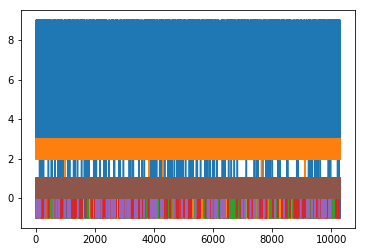

In [53]:
x_train, y_train, x_test, y_test = split(train_data, test_data)
# No difference in result between max_iter=100 and max_iter = 10000
lr = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='ovr', C=0.7)
parameters = {'class_weight': ['None', 'balanced'],
'solver':['lbfgs', 'sag', 'saga'],
}
clf = GridSearchCV(lr, parameters, cv=5)#LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='ovr')
clf.fit(x_train, y_train)
split_train_evaluate(clf, train_data, test_data)
print(clf.best_params_)